<h1 style="color:black" align="center">Неделя 4. Бэггинг и случайный лес</h1>

Загрузите датасет digits с помощью функции `load_digits` из `sklearn.datasets` и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля `data` и `target` в объекте, который возвращает `load_digits`). 

Для оценки качества далее нужно будет использовать `cross_val_score` из `sklearn.model_selection` с параметром cv=10. Эта функция реализует `k-fold cross validation` c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция `cross_val_score` будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов `k-fold cross validation`. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод `.mean()` у массива, который возвращает `cross_val_score`.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с `cross_val_score` несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление `cross_val_score` - можете попробовать использовать параметр `n_jobs`, но будьте осторожны: в одной из старых версий `sklearn` была ошибка, которая приводила к неверному результату работы `cross_val_score` при задании `n_jobs` отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'png'

rcParams['figure.figsize'] = 10, 5
sns.set(style='darkgrid')
sns.set(font_scale=1.5)

In [2]:
X = load_digits()['data']
y = load_digits()['target']

<h3 style="color:#2E8B57">Задача № 1</h3>

Создайте `DecisionTreeClassifier` с настройками по умолчанию и измерьте качество его работы с помощью `cross_val_score`. Эта величина и будет ответом в пункте 1.

<h4 align='center'>Решение:</h4>


In [3]:
model = DecisionTreeClassifier()
score = cross_val_score(model, X, y, cv=10, n_jobs=-1)
print(f'answer_1 = {score.mean()}')

answer_1 = 0.8380260707635008


<h3 style="color:#2E8B57">Задача № 2</h3>

Воспользуйтесь `BaggingClassifier` из `sklearn.ensemble`, чтобы обучить бэггинг над `DecisionTreeClassifier`. Используйте в `BaggingClassifier` параметры по умолчанию, задав только количество деревьев равным 100. 

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

<h4 align='center'>Решение:</h4>

In [4]:
model = BaggingClassifier(n_estimators = 100)
score = cross_val_score(model, X, y, cv=10, n_jobs=-1)
print(f'answer_2 = {score.mean()}')

answer_2 = 0.921502172563625


<h3 style="color:#2E8B57">Задача № 3</h3>

Теперь изучите параметры `BaggingClassifier` и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков
  
<h4 align='center'>Решение:</h4>

In [5]:
model = BaggingClassifier(n_estimators = 100, max_features = int(np.sqrt(X.shape[1])))
score = cross_val_score(model, X, y, cv=10, n_jobs=-1)
print(f'answer_3 = {score.mean()}')

answer_3 = 0.9354469273743018


<h3 style="color:#2E8B57">Задача № 4</h3>

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в `BaggingClassifier` и добавить его в `DecisionTreeClassifier`. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.
  
<h4 align='center'>Решение:</h4>

In [6]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))
bagging = BaggingClassifier(base_estimator=tree, n_estimators=100)
score = cross_val_score(bagging, X, y, cv=10, n_jobs=-1)
print(f'answer_4 = {score.mean()}')

answer_4 = 0.947687771570453


In [7]:
rand = RandomForestClassifier(n_estimators = 100, max_features=int(np.sqrt(X.shape[1])))
score = cross_val_score(rand, X, y, cv=10, n_jobs=-1)
score.mean()

0.9504655493482309

При сравнении с случайного леса на основе `BaggingClassifier` + `DecisionTreeClassifier` с `RandomForestClassifier` было обнаружено, что качество приблизительно равно друг другу.

<h3 style="color:#2E8B57">Задача № 5</h3>

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с `RandomForestClassifier` из `sklearn.ensemble`. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

<h4 align='center'>Решение:</h4>

In [8]:
def custom_rand(X, y, n_estimators, **kwargs):
    tree = DecisionTreeClassifier(**kwargs)
    bagging = BaggingClassifier(base_estimator=tree, n_estimators=n_estimators)
    return cross_val_score(bagging, X, y, cv=10, n_jobs=-1).mean()

def standard_rand(X, y, **kwargs):
    rand = RandomForestClassifier(**kwargs)
    return cross_val_score(rand, X, y, cv=10, n_jobs=-1).mean()

In [9]:
def plot_error(X, y, alg_1, alg_2, title=None, ox=None, oy='Ошибка', **kwargs):
    score_alg_1, score_alg_2 = [], []    
    # Определение итерируемого ключа
    iter_key = None
    for key, value in kwargs.items():
        if type(value) == range:
            iter_key = str(key)
            break
            
    params = kwargs.copy() # Сохраняем копию исходных параметров
    for i in kwargs[iter_key]:
        params[iter_key] = i # Обновляем итерируемый параметр, для передачи в функции
        score_alg_1.append(alg_1(X, y, **params))
        score_alg_2.append(alg_2(X, y, **params))
    
    plt.plot(kwargs[iter_key], score_alg_1, label=f'{alg_1.__name__}')
    plt.plot(kwargs[iter_key], score_alg_2, label=f'{alg_2.__name__}')
    plt.title(title)
    plt.xlabel(ox)
    plt.ylabel(oy)
    plt.legend()
    plt.show()


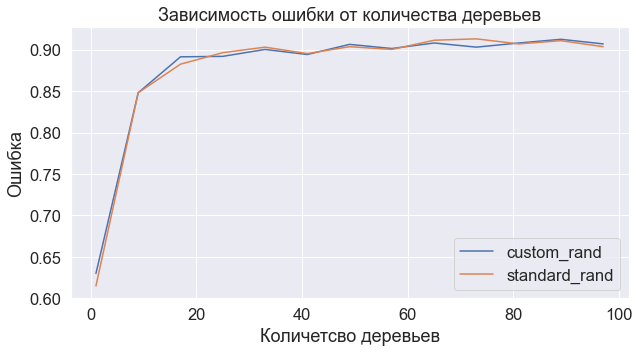

In [13]:
max_features = int(np.sqrt(X.shape[1]))
plot_error(X, y, custom_rand, standard_rand, 
           max_features=max_features, 
           n_estimators=range(1, 100, 8), 
           max_depth=5,
           title='Зависимость ошибки от количества деревьев',
           ox='Количетсво деревьев')

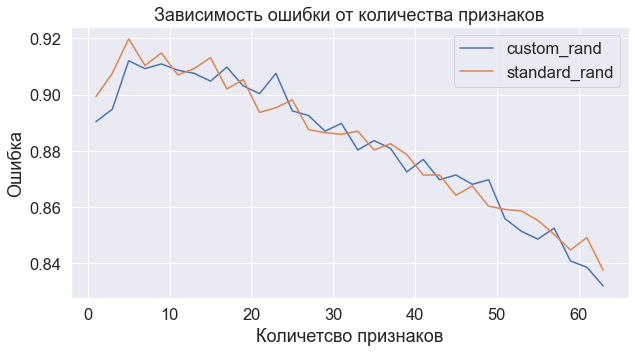

In [14]:
plot_error(X, y, custom_rand, standard_rand, 
           max_features=range(1, X.shape[1], 2), 
           n_estimators=100, 
           max_depth=5,
           title='Зависимость ошибки от количества признаков',
           ox='Количетсво признаков')

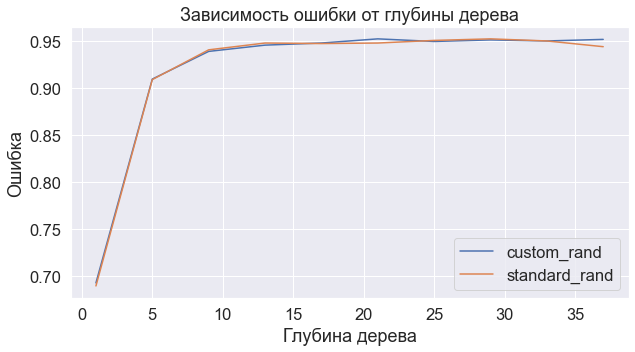

In [15]:
plot_error(X, y, custom_rand, standard_rand, 
           max_features=max_features, 
           n_estimators=100, 
           max_depth=range(1, 40, 4),
           title='Зависимость ошибки от глубины дерева',
           ox='Глубина дерева')

1) Случайный лес сильно переобучается с ростом количества деревьев (Ложь)

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев (Правда)

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. (Правда)

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция. (Правда)

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. (Ложь)

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается. (Ложь)

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). (Правда)